## **Import the required libraries**

In [1]:
# import time
import time
t1 = time.time()

In [2]:
import math
import random
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

**Making the results reproducible (knowing the random seed of the two libraries)**

In [3]:
np_rand_seed = random.randint(0,100)
tf_rand_seed = random.randint(0,100)
# np_rand_seed = 67
# tf_rand_seed = 92
np.random.seed(np_rand_seed)
print("numpy random seed: ",np_rand_seed)
print("tensorflow random seed: ", tf_rand_seed)

numpy random seed:  83
tensorflow random seed:  6


# **Load and Inspect the data**

In [4]:
data = pd.read_json('../input/train.json')
test_data = pd.read_json('../input/test.json')

In [5]:
data.head(5)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [6]:
test_data.head(5)

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


In [7]:
print("Shape of train set:", data.shape)
print("Shape of test set:", test_data.shape)

Shape of train set: (1604, 5)
Shape of test set: (8424, 4)


In [8]:
print("Shape of band 1:",  np.shape(data.band_1.iloc[0]))
print("Shape of band 2:",  np.shape(data.band_2.iloc[0]))

Shape of band 1: (5625,)
Shape of band 2: (5625,)


In [9]:
print("Type of band 1:",  type(data.band_1.iloc[0]))
print("Type of band 2:",  type(data.band_2.iloc[0]))

Type of band 1: <class 'list'>
Type of band 2: <class 'list'>


# **Feature Engineering**


## **Feature engineering on train set**

### **Replacing the na in inc_anlge with mean**********

In [10]:
data[data['inc_angle']=='na'] = data[data['inc_angle']!='na']['inc_angle'].mean()

### **Converting the angle from degrees to radian******

In [11]:
data['inc_angle'] = data['inc_angle'].apply(lambda x: math.radians(x))

In [12]:
data.inc_angle.head()

0    0.766617
1    0.665951
2    0.790388
3    0.764988
4    0.621784
Name: inc_angle, dtype: float64

### **Finding and droping points with mismatch band1 and band2 data**

**Function which return the count and the index of mismatched data**

In [13]:
def find_missing_data(series, shape):
    
    '''function which return the count and the index of mismatched data'''    
    count = 0
    missing_list = []
    for i,x in enumerate(series):   
        if np.shape(series.iloc[i]) != shape:
            missing_list.append(i)
            count += 1
            
    return missing_list, count

**Count and list of mismatched points in band1**

In [14]:
missing_list1, count1 = find_missing_data(data.band_1, (5625,))
print("count: ", count1)
print("missing data: ", missing_list1)

count:  133
missing data:  [101, 126, 142, 145, 176, 179, 191, 278, 286, 342, 412, 431, 440, 493, 642, 666, 667, 730, 741, 742, 763, 822, 863, 868, 906, 916, 996, 1041, 1065, 1095, 1199, 1228, 1247, 1257, 1268, 1290, 1345, 1403, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603]


**Count and list of mismatched points in band2**

In [15]:
missing_list2, count2 = find_missing_data(data.band_2, (5625,))
print("count: ", count1)
print("missing data: ", missing_list2)

count:  133
missing data:  [101, 126, 142, 145, 176, 179, 191, 278, 286, 342, 412, 431, 440, 493, 642, 666, 667, 730, 741, 742, 763, 822, 863, 868, 906, 916, 996, 1041, 1065, 1095, 1199, 1228, 1247, 1257, 1268, 1290, 1345, 1403, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603]


**Check if the missing points are same**

In [16]:
missing_list1 == missing_list2

True

**Function to drop data by index**

In [17]:
def drop_data(df, index):
    
    '''function to drop data by index'''
    return df.drop(df.index[index])

**Drop the points with mismatched images**

In [18]:
data = drop_data(data, missing_list1)

In [19]:
data.shape

(1471, 5)

In [20]:
print("Number of positive classes: ", len(data[data['is_iceberg'] == 1.0]))
print("Number of negative classes: ", len(data[data['is_iceberg'] == 0.0]))

Number of positive classes:  753
Number of negative classes:  718


### 2.1.4 Scale the image data

**standardization to technique we can try on**

In [21]:
def standardise_vector(vector):
    '''standardise vector'''
    standardised_vector = (np.array(vector) - np.mean(vector)) / np.std(vector)
    return standardised_vector.tolist()

In [22]:
def mean_normalise_vector(vector):
    '''mean normalize vector'''
    normalised_vector = (np.array(vector) - np.mean(vector)) / (np.max(vector) - np.min(vector))
    return normalised_vector.tolist()

In [23]:
def min_max_scaler(vector, minimum = 0, maximum = 1):
    '''minmaxscaler'''
    X_std  = (np.array(vector) - np.min(vector)) / (np.max(vector) - np.min(vector))
    scaled_vector = X_std * (maximum - minimum) + minimum
    return scaled_vector.tolist()

**We will use standardisation as the  normalization technique since this works well with images**

In [24]:
data['band_1'] = data['band_1'].apply(standardise_vector)
data['band_2'] = data['band_2'].apply(standardise_vector)

In [25]:
data.head(5)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[0.01182174564467684, 0.27378275943768166, -0....","[1.1573585860406173, 0.15631457838356574, -0.4...",dfd5f913,0.766617,0.0
1,"[0.42137323598577087, -0.43078366534450846, -0...","[-2.0950953014724543, -0.8948057535299927, -0....",e25388fd,0.665951,0.0
2,"[-0.6969623073924855, -0.6969793944501068, -0....","[-0.014649839717716016, 0.35157292381049343, 1...",58b2aaa0,0.790388,1.0
3,"[0.2946591706447792, 0.04985985071106006, -0.3...","[0.7023040788844376, 0.8569610477684707, 1.005...",4cfc3a18,0.764988,0.0
4,"[-0.31533024179271146, 0.9175181439939705, 0.9...","[-0.693769690678262, -2.0346940986353044, -2.0...",271f93f4,0.621784,0.0


### **Reshaping the band1 and band2 data into 2D image**

In [26]:
band_1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_1"]])
band_2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_2"]])

In [27]:
print("Shape of band 1 image:",band_1.shape)
print("Shape of band 2 image:",band_2.shape)

Shape of band 1 image: (1471, 75, 75)
Shape of band 2 image: (1471, 75, 75)


## **Feature engieering on test Set**

**We carry out the same feature engineering as carried out on train set**

In [28]:
test_data['inc_angle'] = test_data['inc_angle'].apply(lambda x: math.radians(x))

In [29]:
test_data.inc_angle.head()

0    0.610279
1    0.569240
2    0.654593
3    0.601683
4    0.766529
Name: inc_angle, dtype: float64

In [30]:
missing_list3, count3 = find_missing_data(test_data.band_1, (5625,))
print("count: ", count3)
print("missing data: ", missing_list3)

count:  0
missing data:  []


In [31]:
missing_list4, count4 = find_missing_data(test_data.band_2, (5625,))
print("count: ", count4)
print("missing data: ", missing_list4)

count:  0
missing data:  []


In [32]:
test_data['band_1'] = test_data['band_1'].apply(standardise_vector)
test_data['band_2'] = test_data['band_2'].apply(standardise_vector)

In [33]:
band_1_test = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_data["band_1"]])
band_2_test = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_data["band_2"]])

In [34]:
print("Shape of test set band 1 image:",band_1_test.shape)
print("Shape of test set band 2 image:",band_2_test.shape)

Shape of test set band 1 image: (8424, 75, 75)
Shape of test set band 2 image: (8424, 75, 75)


# **Train/test/validation split**

**Extract the labels and angles of train set**

In [35]:
labels = data.is_iceberg.as_matrix()
angles = data.inc_angle.as_matrix()

**Carry out splits**

In [36]:
# randomly choosing the train and validation indices
train_indices = np.random.choice(len(labels), round(len(labels)*0.75), replace=False)
validation_indices = np.array(list(set(range(len(labels))) - set(train_indices)))

# extract train set
band_1_train = band_1[train_indices]
band_2_train = band_2[train_indices]
angles_train = angles[train_indices]
labels_train = labels[train_indices]

# extract validation set
band_1_validation = band_1[validation_indices]
band_2_validation = band_2[validation_indices]
angles_validation = angles[validation_indices]
labels_validation = labels[validation_indices]

# extract test set
band_1_test = band_1_test
band_2_test = band_2_test
angles_test = test_data.inc_angle.as_matrix()
iD = test_data.id.as_matrix()

**Covert the types of all data to float**

In [37]:
band_1_train = band_1_train.astype(np.float32)
band_1_validation = band_1_validation.astype(np.float32)
band_1_test = band_1_test.astype(np.float32)
band_2_train = band_2_train.astype(np.float32)
band_2_validation = band_2_validation.astype(np.float32)
band_2_test = band_2_test.astype(np.float32)
angles_train = angles_train.astype(np.float32)
angles_validation = angles_validation.astype(np.float32)
angles_test = angles_test.astype(np.float32)
labels_train = labels_train.astype(np.float32)
labels_validation = labels_validation.astype(np.float32)
iD = iD.astype(np.str)

In [38]:
# delete the unnecessary variables out of memory
del(data, test_data, band_1, band_2)

**Examine the shape of the data**

In [39]:
print("Shape of band_1_train:",band_1_train.shape)
print("Shape of band_2_train:",band_1_train.shape)
print("Shape of angles_train:",angles_train.shape)
print("Shape of labels_train:",labels_train.shape)
print("Shape of band_1_validation:",band_1_validation.shape)
print("Shape of band_2_validation:",band_2_validation.shape)
print("Shape of angles_validation:",angles_validation.shape)
print("Shape of labels_validation:",labels_validation.shape)
print("Shape of band_1_test:",band_1_test.shape)
print("Shape of band_2_test:",band_2_test.shape)
print("Shape of angles_test:",angles_test.shape)
print("Shape of iD:",iD.shape)

Shape of band_1_train: (1103, 75, 75)
Shape of band_2_train: (1103, 75, 75)
Shape of angles_train: (1103,)
Shape of labels_train: (1103,)
Shape of band_1_validation: (368, 75, 75)
Shape of band_2_validation: (368, 75, 75)
Shape of angles_validation: (368,)
Shape of labels_validation: (368,)
Shape of band_1_test: (8424, 75, 75)
Shape of band_2_test: (8424, 75, 75)
Shape of angles_test: (8424,)
Shape of iD: (8424,)


# **Augmenting train set**

## **Functions to carry out different augmentation technique**

**Image Rotation**

In [40]:
def rotate_image(img, angle = 20):
    
    '''a function to rotate image by a given degree'''
    
    # rotate image
    original = img.copy()

    M_rotate = cv2.getRotationMatrix2D((37,37),angle,1)
    img_new = cv2.warpAffine(img,M_rotate,(75,75))
    
    length_row = 0
    length_column = 0
    boundary_step = 5
    
    for i in range(len(img_new)):
        if img_new[0,i]!=float(0.0):
            length_row = i
            break
    for i in range(len(img_new)):
        if img_new[i,0]!=float(0.0):
            length_column = i
            break
    
    # subsitute the padding from original image
    img_new[:length_column+boundary_step,:length_row+boundary_step] = \
    original[:length_column+boundary_step,:length_row+boundary_step] 
    img_new[-(length_row+boundary_step):,:length_column+boundary_step] = \
    original[-(length_row+boundary_step):,:length_column+boundary_step]
    img_new[:length_row+boundary_step,-(length_column+boundary_step):] = \
    original[:length_row+boundary_step,-(length_column+boundary_step):]
    img_new[-(length_column+boundary_step):,-(length_row+boundary_step):] = \
    original[-(length_column+boundary_step):,-(length_row+boundary_step):]
    
    return img_new

**Horizontal translation**

In [41]:
def translate_horizontal(image, shift_horizontal = 5):
    
    '''a function to translate image horizontally by a shift'''
    
    # horizontally shift image
    img = image.copy()
    
    shift_vertical = 0; 
    if shift_horizontal<0:
        image_slice = img[:,shift_horizontal:].copy()
    if shift_horizontal>0:
        image_slice = img[:,:shift_horizontal].copy()
    M_translate = np.float32([[1,0,shift_horizontal],[0,1,shift_vertical]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_horizontal<0:
        img_new[:,shift_horizontal:] = image_slice
    if shift_horizontal>0:
        img_new[:,:shift_horizontal] = image_slice
        
    return img_new.reshape(75,75).astype(np.float32)

**Vertical translation**

In [42]:
def translate_vertical(image, shift_vertical = 5):
    
    '''a function to translate image vertically by a shift'''
    
    # vertically shift image
    img = image.copy()
    
    shift_horizontal = 0;
    if shift_vertical<0:
        image_slice = img[shift_vertical:,:].copy()
    if shift_vertical>0:
        image_slice = img[:shift_vertical,:].copy()
    M_translate = np.float32([[1,0,shift_horizontal],[0,1,shift_vertical]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_vertical<0:
        img_new[shift_vertical:,:] = image_slice
    if shift_vertical>0:
        img_new[:shift_vertical,:] = image_slice
        
    return img_new.reshape(75,75).astype(np.float32)

**Translation along positive diagonal**

In [43]:
def translate_positive_diagonal(image, shift_diagonal = 5):
    
    '''a function to translate image along positive diagonal'''
    
    # translate image along positive diagonal
    img = image.copy()
    
    if shift_diagonal<0:
        hor_slice = img[shift_diagonal:,:].copy()
        ver_slice = img[:,shift_diagonal:].copy()
    else:
        hor_slice = img[:shift_diagonal,:].copy()
        ver_slice = img[:,:shift_diagonal].copy()
    M_translate = np.float32([[1,0,shift_diagonal],[0,1,shift_diagonal]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_diagonal<0:
        img_new[shift_diagonal:,:] = hor_slice
        img_new[:,shift_diagonal:] = ver_slice
    else:
        img_new[:shift_diagonal,:] = hor_slice
        img_new[:,:shift_diagonal] = ver_slice
    
    return img_new.reshape(75,75).astype(np.float32)

**Translation along negative diagonal**

In [44]:
def translate_negative_diagonal(image, shift_diagonal = 5):
    
    '''a function to translate image along negative diagonal'''
    
    # translate image along negative diagonal
    img = image.copy()
    
    if shift_diagonal<0:
        hor_slice = img[:-shift_diagonal,:].copy()
        ver_slice = img[:,shift_diagonal:].copy()
    if shift_diagonal>0:
        hor_slice = img[-shift_diagonal:,:].copy()
        ver_slice = img[:,:shift_diagonal].copy()
    M_translate = np.float32([[1,0,shift_diagonal],[0,1,-shift_diagonal]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_diagonal<0:
        img_new[:-shift_diagonal,:] = hor_slice
        img_new[:,shift_diagonal:] = ver_slice
    if shift_diagonal>0:
        img_new[-shift_diagonal:,:] = hor_slice
        img_new[:,:shift_diagonal] = ver_slice
        
    return img_new.reshape(75,75).astype(np.float32)

**Flip Image**

In [45]:
def flip(image, direction = 0):
    
    '''a function to flip image'''
    img = image.copy()
    return cv2.flip(img,direction)

**Zoom image**

In [46]:
def zoom(image, zoom_shift = 5):
    
    '''a function to zoom image'''
    
    # zoom image
    img = image.copy()
    
    # zoom in 
    if zoom_shift>0:
        # scale
        img_new = cv2.resize(img, (75+zoom_shift*2,75+zoom_shift*2)) 
        # crop
        img_new = img_new[zoom_shift:-zoom_shift,zoom_shift:-zoom_shift] 
    # zoom out
    else:
        zoom_shift *=-1
        
        hor_top = img[:zoom_shift,:]
        hor_bottom =img[-zoom_shift:,:]
        ver_left = img[:,:zoom_shift]
        ver_right = img[:,-zoom_shift:]
        
        # scale
        img_new = cv2.resize(img, (75-zoom_shift*2,75-zoom_shift*2)) 
        # zero padding
        img_new = cv2.copyMakeBorder(img_new,zoom_shift,zoom_shift,zoom_shift,zoom_shift,
                                     cv2.BORDER_CONSTANT,value=0.0)
        # subsitute the padding from original image
        img_new[:zoom_shift,:] = hor_top
        img_new[-zoom_shift:,:] = hor_bottom
        img_new[:,:zoom_shift] = ver_left
        img_new[:,-zoom_shift:] = ver_right     
        
    return img_new.reshape(75,75).astype(np.float32)

## **Displaying augmented samples**

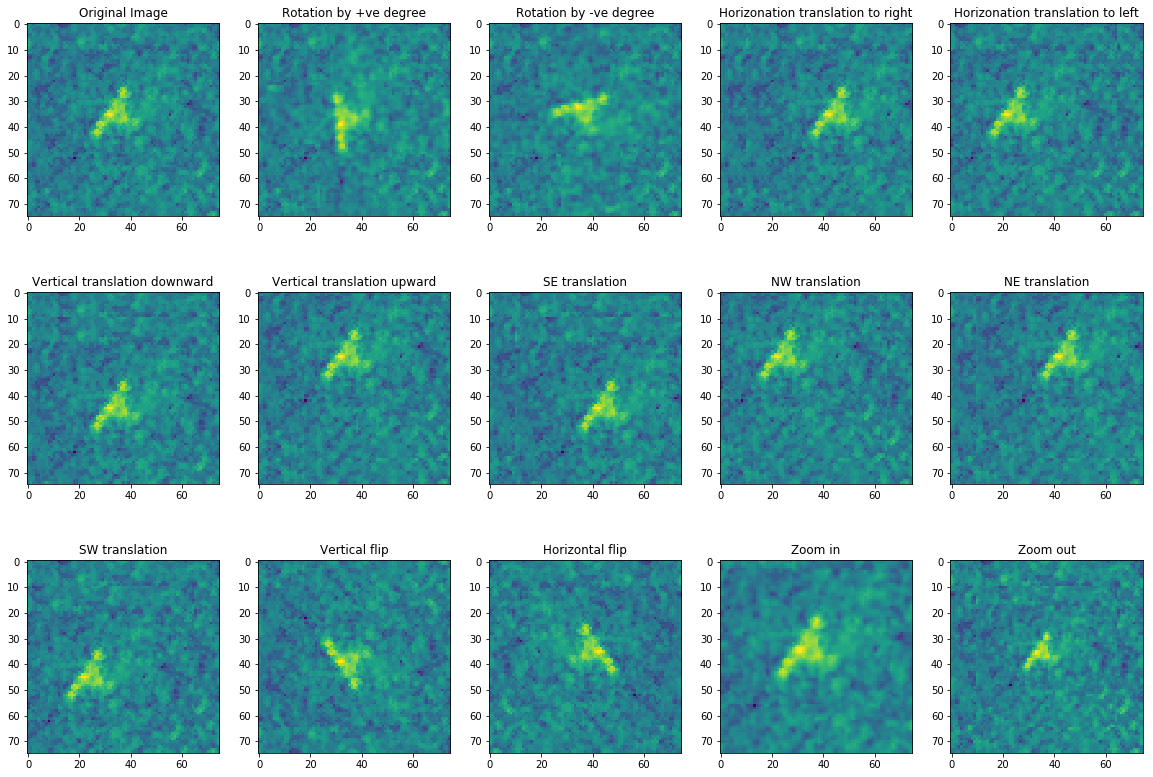

In [47]:
matplotlib.rcParams['figure.figsize'] = (20.0, 14.0)
image = band_1_test[3].copy()
plt.subplot(3, 5, 1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(3, 5, 2)
generated_image = rotate_image(image,40)
plt.title("Rotation by +ve degree")
plt.imshow(generated_image)
plt.subplot(3, 5, 3)
generated_image = rotate_image(image,-40)
plt.title("Rotation by -ve degree")
plt.imshow(generated_image)
plt.subplot(3, 5, 4)
generated_image = translate_horizontal(image,10)
plt.title("Horizonation translation to right")
plt.imshow(generated_image)
plt.subplot(3, 5, 5)
generated_image = translate_horizontal(image,-10)
plt.title("Horizonation translation to left")
plt.imshow(generated_image)
plt.subplot(3, 5, 6)
generated_image = translate_vertical(image,10)
plt.title("Vertical translation downward")
plt.imshow(generated_image)
plt.subplot(3, 5, 7)
generated_image = translate_vertical(image,-10)
plt.title("Vertical translation upward")
plt.imshow(generated_image)
plt.subplot(3, 5, 8)
generated_image = translate_positive_diagonal(image,10)
plt.title("SE translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 9)
generated_image = translate_positive_diagonal(image,-10)
plt.title("NW translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 10)
generated_image = translate_negative_diagonal(image,10)
plt.title("NE translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 11)
generated_image = translate_negative_diagonal(image,-10)
plt.title("SW translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 12)
generated_image = flip(image,0)
plt.title("Vertical flip")
plt.imshow(generated_image)
plt.subplot(3, 5, 13)
generated_image = flip(image,1)
plt.title("Horizontal flip")
plt.imshow(generated_image)
plt.subplot(3, 5, 14)
generated_image = zoom(image,10)
plt.title("Zoom in")
plt.imshow(generated_image)
plt.subplot(3, 5, 15)
generated_image = zoom(image,-10)
plt.title("Zoom out")
plt.imshow(generated_image)
plt.show()

## **4.3 Augmentation of train set**

In [48]:
def augment_data(band1, band2, angles, labels):
    
    '''a function to augment band1 and band2 image'''
    
    # list to store the generated data
    band1_generated = []
    band2_generated = []
    angles_generated = []
    labels_generated = []
    
    # iterate through each point in train set
    for i in range(labels.shape[0]):
        
        # rotate by positive degree
        angle = np.random.randint(5,20)
        band1_generated.append(rotate_image(band1[i],angle)) 
        band2_generated.append(rotate_image(band2[i],angle))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # rotate by negative degree
        angle = np.random.randint(5,20)
        band1_generated.append(rotate_image(band1[i],-angle)) 
        band2_generated.append(rotate_image(band2[i],-angle))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # positive horizontal shift
        shift = np.random.randint(3,7)
        band1_generated.append(translate_horizontal(band1[i],+shift)) 
        band2_generated.append(translate_horizontal(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # negative horizontal shift
        shift = np.random.randint(3,7) 
        band1_generated.append(translate_horizontal(band1[i],-shift)) 
        band2_generated.append(translate_horizontal(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # positive vertical shift
        shift = np.random.randint(0,7)  
        band1_generated.append(translate_vertical(band1[i],+shift)) 
        band2_generated.append(translate_vertical(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # negative vertical shift
        shift = np.random.randint(3,7) 
        band1_generated.append(translate_vertical(band1[i],-shift)) 
        band2_generated.append(translate_vertical(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along positive diagonal in positive direction
        shift = np.random.randint(3,7)  
        band1_generated.append(translate_positive_diagonal(band1[i],+shift)) 
        band2_generated.append(translate_positive_diagonal(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along positive diagonal in negative direction
        shift = np.random.randint(3,7)  
        band1_generated.append(translate_positive_diagonal(band1[i],-shift)) 
        band2_generated.append(translate_positive_diagonal(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along negative diagonal in positive direction
        shift = np.random.randint(3,7)   
        band1_generated.append(translate_negative_diagonal(band1[i],+shift)) 
        band2_generated.append(translate_negative_diagonal(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along negative diagonal in negative direction
        shift = np.random.randint(3,7)   
        band1_generated.append(translate_negative_diagonal(band1[i],-shift)) 
        band2_generated.append(translate_negative_diagonal(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # vertical flip
        band1_generated.append(flip(band1[i],0)) 
        band2_generated.append(flip(band2[i],0))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # horizontal flip
        band1_generated.append(flip(band1[i],1)) 
        band2_generated.append(flip(band2[i],1))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # zoom in image
        zoom_shift = np.random.randint(2,5)
        band1_generated.append(zoom(band1[i],zoom_shift)) 
        band2_generated.append(zoom(band2[i],zoom_shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # zoom out image
        zoom_shift = np.random.randint(2,5) 
        band1_generated.append(zoom(band1[i],-zoom_shift)) 
        band2_generated.append(zoom(band2[i],-zoom_shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])        
        
    # convert the generated data into numpy array
    band1_generated = np.array(band1_generated)
    band2_generated = np.array(band2_generated)
    angles_generated = np.array(angles_generated)
    labels_generated = np.array(labels_generated)
    
    # concatenate the generated data to original train set
    band1_augmented = np.concatenate((band1, band1_generated),axis=0)
    band2_augmented = np.concatenate((band2, band2_generated),axis=0)
    angles_augmented = np.concatenate((angles, angles_generated),axis=0)
    labels_augmented = np.concatenate((labels, labels_generated),axis=0)
    
    return band1_augmented, band2_augmented, angles_augmented, labels_augmented

In [49]:
# augment train set
band_1_train, band_2_train, angles_train, labels_train = \
    augment_data(band_1_train, band_2_train, angles_train, labels_train)

**Examine the shape of augmented data**

In [50]:
print("Shape of band_1_train:",band_1_train.shape)
print("Shape of band_2_train:",band_2_train.shape)
print("Shape of angles_train:",angles_train.shape)
print("Shape of labels_train:",labels_train.shape)

Shape of band_1_train: (16545, 75, 75)
Shape of band_2_train: (16545, 75, 75)
Shape of angles_train: (16545,)
Shape of labels_train: (16545,)


# **Create Recurrent Neural Network**

In [51]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
# sess = tf.InteractiveSession()

**RNN Design parameters**

In [52]:
n_steps = 75
n_inputs = 75
n_neurons = 128
n_outputs = 2
n_layers = 3

**One hot encode the labesl**

In [53]:
labels_train = pd.get_dummies(labels_train).as_matrix()
labels_validation = pd.get_dummies(labels_validation).as_matrix()

**Create placeholders**

In [54]:
band1 = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
band2 = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y_true = tf.placeholder(tf.float32, [None, n_outputs])
keep_prob = tf.placeholder(tf.float32)

**Create Deep RNN for band1**

In [55]:
with tf.variable_scope("lstm-band1"):
    lstm_cells1 = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
                  for layer in range(n_layers)]
    multi_cell1 = tf.contrib.rnn.MultiRNNCell(lstm_cells1)
    output1, state1 = tf.nn.dynamic_rnn(multi_cell1, band1, dtype=tf.float32)
    top_layer_h_state1 = state1[-1][1]

**Create Deep RNN for band2**

In [56]:
with tf.variable_scope("lstm-band2"):
    lstm_cells2 = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
                  for layer in range(n_layers)]
    multi_cell2 = tf.contrib.rnn.MultiRNNCell(lstm_cells2)
    output2, state2 = tf.nn.dynamic_rnn(multi_cell2, band2, dtype=tf.float32)
    top_layer_h_state2 = state2[-1][1]

In [57]:
top_layer_h_state1

<tf.Tensor 'lstm-band1/rnn/while/Exit_8:0' shape=(?, 128) dtype=float32>

In [58]:
top_layer_h_state2

<tf.Tensor 'lstm-band2/rnn/while/Exit_8:0' shape=(?, 128) dtype=float32>

**Combine the output of the 2 RNNs**

In [59]:
combined_layer = tf.concat((top_layer_h_state1, top_layer_h_state2), axis=1)
combined_layer

<tf.Tensor 'concat:0' shape=(?, 256) dtype=float32>

### **Create fully connected layers**

**Functions to create weight and bias tensors**

In [60]:
def create_weights(shape):
    '''a function to create weight tensor'''
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
 
def create_biases(size):
    '''a function to create bias tensor'''
    return tf.Variable(tf.constant(0.05, shape=[size]))

**Funtion to create fully connected layer**

In [61]:
def create_fc_layer(input,          
                    num_inputs,    
                    num_outputs,
                    use_relu=True,
                    dropout = False, 
                    keep_prob = 0.8):
    
    '''a function for creating fully connected layer'''
    
    #Let's define trainable weights and biases.
    weights = create_weights(shape=[num_inputs, num_outputs])
    biases = create_biases(num_outputs)
    
    # matrix multiplication between input and weight matrix
    layer = tf.matmul(input, weights) + biases
    
    # add relu activation if wanted
    if use_relu:
        layer = tf.nn.relu(layer)
        
    # if dropout is wanted add dropout
    if dropout:        
        layer = tf.nn.dropout(layer, keep_prob)
    
    # return layer
    return layer

**Design parameters of fully connected layers**

In [62]:
# number of featuers of 1st fully connected layer
fc_layer_size1 = 128
# number of featuers of 2nd fully connected layer
fc_layer_size2 = 64

**Create first fully connected layer**

In [63]:
layer_fc1 = create_fc_layer(input=combined_layer,
                            num_inputs=combined_layer.get_shape()[1].value,
                            num_outputs=fc_layer_size1,
                            use_relu=True,
                            dropout =True,
                            keep_prob = keep_prob)
layer_fc1

<tf.Tensor 'dropout/mul:0' shape=(?, 128) dtype=float32>

**Create second fully connected layer**

In [64]:
layer_fc2 = create_fc_layer(input=layer_fc1,
                            num_inputs=fc_layer_size1,
                            num_outputs=fc_layer_size2,
                            use_relu=True,
                            dropout =True,
                            keep_prob = keep_prob)
layer_fc2

<tf.Tensor 'dropout_1/mul:0' shape=(?, 64) dtype=float32>

**Create the output layer**

In [65]:
logits = create_fc_layer(input=layer_fc2,
                            num_inputs=fc_layer_size2,
                            num_outputs=n_outputs,
                            use_relu=True,
                            dropout =True,
                            keep_prob = keep_prob)
logits

<tf.Tensor 'dropout_2/mul:0' shape=(?, 2) dtype=float32>

**Create operations for accuracy and prediction**

In [66]:
# softmax operation on the output layer
y_pred = tf.nn.softmax(logits)
# extract the vector of predicted class
y_pred_cls = tf.argmax(y_pred, axis=1, output_type=tf.int32)
# extract the vector of labels
y_true_cls = tf.argmax(y_true, axis=1, output_type=tf.int32)

In [67]:
# extract the vector of correct prediction
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
# operation to calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**Create loss function**

In [68]:
# operation to calculate cross entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                    labels=y_true)
# mean of cross entropy to act as the loss
loss = tf.reduce_mean(cross_entropy)

**Create optimizer**

In [69]:
# learning rate of optimizer
learning_rate = (1e-4)
# train step
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# **Train Model**

In [70]:
# lists to store the train loss, validation loss, validation accuracy at each iteration
train_loss = []
valid_loss = []
valid_acc = []

# batch size
batch_size = 255
# max iteration
max_iter = 1400

**Here we train and save the model with the highest accuracy or lowest loss. But here I think it is wise to save the model with lowest loss**

In [71]:
# create a saver object
saver = tf.train.Saver(max_to_keep=1)

# variables to store the accuracy, loss, iteration of our best model
best_accuracy = 0
best_loss = 1000000
best_iteration = None

iteration = 0

# create a graph session and optimize under it
with tf.Session() as sess:
    
    # initialize variables
    sess.run(tf.global_variables_initializer())

    # while 57 minutes have not elapsed (to finish before the kernel is killed)
    while (time.time()-t1) < 58*60:
        
        # break if max iteration is reached
        if iteration >= max_iter:
            break

        # randomly choosing the indices of the batch 
        rand_index = np.random.choice(labels_train.shape[0], size=batch_size)

        # extract the batch image and labels
        band1_rand = band_1_train[rand_index]
        band2_rand = band_2_train[rand_index]
        labels_rand = labels_train[rand_index]

        # feed dictionary for batch
        feed_dict_batch =  {band1: band1_rand,
                            band2: band2_rand,
                            y_true: labels_rand,
                            keep_prob: 0.8}
        # feed dictionary for train
        feed_dict_train =  {band1: band1_rand,
                            band2: band2_rand,
                            y_true: labels_rand,
                            keep_prob: 1.0}
        # feed dictionary for validation
        feed_dict_validation =  {band1: band_1_validation,
                                 band2: band_2_validation,
                                 y_true: labels_validation,
                                 keep_prob: 1.0}
        
        # execute optimization step
        sess.run(train_step, feed_dict=feed_dict_batch)

        # calculate temporary train loss and append it to the designated list
        temp_train_loss = loss.eval(session=sess, feed_dict=feed_dict_train)
        train_loss.append(temp_train_loss)
        # calculate temporary validation loss and append it to the designated list
        temp_validation_loss = loss.eval(session=sess, feed_dict=feed_dict_validation)
        valid_loss.append(temp_validation_loss)
        # calculate temporary validation accuracy and append it to the designated list
        temp_validation_accuracy = accuracy.eval(session=sess, feed_dict=feed_dict_validation)
        valid_acc.append(temp_validation_accuracy)

        # if the valid loss is tied with best recorded so far but valid acc is better then
        # update the parameters of the best model and save the model
        if (temp_validation_loss == best_loss) and (temp_validation_accuracy > best_accuracy):
            best_accuracy = temp_validation_accuracy
            best_loss = temp_validation_loss
            best_iteration = iteration           
            saver.save(sess, './my-model', global_step = best_iteration)
        
        # if valid accuracy is better than best recorded so far then update the best valid accuracy
        if temp_validation_accuracy > best_accuracy:
            best_accuracy = temp_validation_accuracy
        
        # if valid loss is better than best recorded so far then
        # update the parameters of the best model and save the model
        if temp_validation_loss < best_loss:
            best_loss = temp_validation_loss
            best_iteration = iteration          
            saver.save(sess, './my-model', global_step = best_iteration)

        # print metric info
        print("iterations:",iteration,
              "| train_loss:", temp_train_loss,
              "| validation_loss:", temp_validation_loss,
              "| valid_accuracy:", temp_validation_accuracy)
        
        # increment iteration
        iteration = iteration+1

iterations: 0 | train_loss: 0.693465 | validation_loss: 0.691581 | valid_accuracy: 0.535326
iterations: 1 | train_loss: 0.692568 | validation_loss: 0.691419 | valid_accuracy: 0.557065
iterations: 2 | train_loss: 0.692239 | validation_loss: 0.691212 | valid_accuracy: 0.589674
iterations: 3 | train_loss: 0.692651 | validation_loss: 0.691052 | valid_accuracy: 0.627717
iterations: 4 | train_loss: 0.691457 | validation_loss: 0.690874 | valid_accuracy: 0.633152
iterations: 5 | train_loss: 0.691876 | validation_loss: 0.690712 | valid_accuracy: 0.611413
iterations: 6 | train_loss: 0.690199 | validation_loss: 0.690552 | valid_accuracy: 0.603261
iterations: 7 | train_loss: 0.690725 | validation_loss: 0.690361 | valid_accuracy: 0.603261
iterations: 8 | train_loss: 0.690816 | validation_loss: 0.690188 | valid_accuracy: 0.584239
iterations: 9 | train_loss: 0.690551 | validation_loss: 0.690039 | valid_accuracy: 0.565217
iterations: 10 | train_loss: 0.688558 | validation_loss: 0.689869 | valid_accura

iterations: 89 | train_loss: 0.565504 | validation_loss: 0.57513 | valid_accuracy: 0.711957
iterations: 90 | train_loss: 0.595844 | validation_loss: 0.571847 | valid_accuracy: 0.720109
iterations: 91 | train_loss: 0.646007 | validation_loss: 0.56027 | valid_accuracy: 0.733696
iterations: 92 | train_loss: 0.556894 | validation_loss: 0.545855 | valid_accuracy: 0.752717
iterations: 93 | train_loss: 0.593287 | validation_loss: 0.54279 | valid_accuracy: 0.741848
iterations: 94 | train_loss: 0.57354 | validation_loss: 0.543201 | valid_accuracy: 0.733696
iterations: 95 | train_loss: 0.566197 | validation_loss: 0.541511 | valid_accuracy: 0.722826
iterations: 96 | train_loss: 0.562793 | validation_loss: 0.536992 | valid_accuracy: 0.720109
iterations: 97 | train_loss: 0.564799 | validation_loss: 0.532795 | valid_accuracy: 0.741848
iterations: 98 | train_loss: 0.565926 | validation_loss: 0.530825 | valid_accuracy: 0.747283
iterations: 99 | train_loss: 0.542218 | validation_loss: 0.530455 | valid_

iterations: 177 | train_loss: 0.414547 | validation_loss: 0.410323 | valid_accuracy: 0.817935
iterations: 178 | train_loss: 0.377143 | validation_loss: 0.413212 | valid_accuracy: 0.8125
iterations: 179 | train_loss: 0.386446 | validation_loss: 0.416407 | valid_accuracy: 0.807065
iterations: 180 | train_loss: 0.424585 | validation_loss: 0.415922 | valid_accuracy: 0.804348
iterations: 181 | train_loss: 0.395798 | validation_loss: 0.416961 | valid_accuracy: 0.798913
iterations: 182 | train_loss: 0.395024 | validation_loss: 0.415078 | valid_accuracy: 0.796196
iterations: 183 | train_loss: 0.393886 | validation_loss: 0.412653 | valid_accuracy: 0.80163
iterations: 184 | train_loss: 0.348484 | validation_loss: 0.412363 | valid_accuracy: 0.807065
iterations: 185 | train_loss: 0.377974 | validation_loss: 0.412405 | valid_accuracy: 0.807065
iterations: 186 | train_loss: 0.367165 | validation_loss: 0.412012 | valid_accuracy: 0.807065
iterations: 187 | train_loss: 0.423001 | validation_loss: 0.410

iterations: 265 | train_loss: 0.335848 | validation_loss: 0.380898 | valid_accuracy: 0.826087
iterations: 266 | train_loss: 0.341729 | validation_loss: 0.381995 | valid_accuracy: 0.826087
iterations: 267 | train_loss: 0.345376 | validation_loss: 0.382506 | valid_accuracy: 0.828804
iterations: 268 | train_loss: 0.345095 | validation_loss: 0.377483 | valid_accuracy: 0.826087
iterations: 269 | train_loss: 0.314842 | validation_loss: 0.381232 | valid_accuracy: 0.820652
iterations: 270 | train_loss: 0.295552 | validation_loss: 0.392705 | valid_accuracy: 0.820652
iterations: 271 | train_loss: 0.369529 | validation_loss: 0.401457 | valid_accuracy: 0.815217
iterations: 272 | train_loss: 0.268854 | validation_loss: 0.386112 | valid_accuracy: 0.82337
iterations: 273 | train_loss: 0.312762 | validation_loss: 0.375636 | valid_accuracy: 0.826087
iterations: 274 | train_loss: 0.362451 | validation_loss: 0.377321 | valid_accuracy: 0.826087
iterations: 275 | train_loss: 0.327359 | validation_loss: 0.3

iterations: 353 | train_loss: 0.258497 | validation_loss: 0.345001 | valid_accuracy: 0.845109
iterations: 354 | train_loss: 0.24047 | validation_loss: 0.342832 | valid_accuracy: 0.855978
iterations: 355 | train_loss: 0.248953 | validation_loss: 0.34454 | valid_accuracy: 0.858696
iterations: 356 | train_loss: 0.272275 | validation_loss: 0.34561 | valid_accuracy: 0.861413
iterations: 357 | train_loss: 0.286985 | validation_loss: 0.351703 | valid_accuracy: 0.839674
iterations: 358 | train_loss: 0.266514 | validation_loss: 0.353954 | valid_accuracy: 0.839674
iterations: 359 | train_loss: 0.237011 | validation_loss: 0.35632 | valid_accuracy: 0.836957
iterations: 360 | train_loss: 0.240623 | validation_loss: 0.347991 | valid_accuracy: 0.842391
iterations: 361 | train_loss: 0.225368 | validation_loss: 0.345932 | valid_accuracy: 0.850543
iterations: 362 | train_loss: 0.25891 | validation_loss: 0.343951 | valid_accuracy: 0.847826
iterations: 363 | train_loss: 0.268359 | validation_loss: 0.34234

iterations: 441 | train_loss: 0.235443 | validation_loss: 0.328359 | valid_accuracy: 0.853261
iterations: 442 | train_loss: 0.224645 | validation_loss: 0.323582 | valid_accuracy: 0.861413
iterations: 443 | train_loss: 0.21987 | validation_loss: 0.321648 | valid_accuracy: 0.853261
iterations: 444 | train_loss: 0.234106 | validation_loss: 0.325728 | valid_accuracy: 0.850543
iterations: 445 | train_loss: 0.2422 | validation_loss: 0.328167 | valid_accuracy: 0.847826
iterations: 446 | train_loss: 0.26426 | validation_loss: 0.328972 | valid_accuracy: 0.853261
iterations: 447 | train_loss: 0.174523 | validation_loss: 0.333928 | valid_accuracy: 0.855978
iterations: 448 | train_loss: 0.225486 | validation_loss: 0.339863 | valid_accuracy: 0.850543
iterations: 449 | train_loss: 0.227457 | validation_loss: 0.343307 | valid_accuracy: 0.855978
iterations: 450 | train_loss: 0.230243 | validation_loss: 0.339984 | valid_accuracy: 0.850543
iterations: 451 | train_loss: 0.266405 | validation_loss: 0.3369

iterations: 529 | train_loss: 0.211859 | validation_loss: 0.337295 | valid_accuracy: 0.847826
iterations: 530 | train_loss: 0.226577 | validation_loss: 0.334828 | valid_accuracy: 0.853261
iterations: 531 | train_loss: 0.198569 | validation_loss: 0.335613 | valid_accuracy: 0.853261
iterations: 532 | train_loss: 0.24798 | validation_loss: 0.338817 | valid_accuracy: 0.855978
iterations: 533 | train_loss: 0.195633 | validation_loss: 0.338781 | valid_accuracy: 0.855978
iterations: 534 | train_loss: 0.23073 | validation_loss: 0.331594 | valid_accuracy: 0.858696
iterations: 535 | train_loss: 0.222515 | validation_loss: 0.330891 | valid_accuracy: 0.866848
iterations: 536 | train_loss: 0.219557 | validation_loss: 0.327091 | valid_accuracy: 0.86413
iterations: 537 | train_loss: 0.148211 | validation_loss: 0.328766 | valid_accuracy: 0.853261
iterations: 538 | train_loss: 0.206395 | validation_loss: 0.332833 | valid_accuracy: 0.855978
iterations: 539 | train_loss: 0.193236 | validation_loss: 0.333

iterations: 617 | train_loss: 0.204169 | validation_loss: 0.346472 | valid_accuracy: 0.855978
iterations: 618 | train_loss: 0.153378 | validation_loss: 0.353407 | valid_accuracy: 0.855978
iterations: 619 | train_loss: 0.185331 | validation_loss: 0.36197 | valid_accuracy: 0.853261
iterations: 620 | train_loss: 0.166673 | validation_loss: 0.371644 | valid_accuracy: 0.839674
iterations: 621 | train_loss: 0.142302 | validation_loss: 0.370207 | valid_accuracy: 0.839674
iterations: 622 | train_loss: 0.208872 | validation_loss: 0.367251 | valid_accuracy: 0.842391
iterations: 623 | train_loss: 0.200568 | validation_loss: 0.355526 | valid_accuracy: 0.853261
iterations: 624 | train_loss: 0.172055 | validation_loss: 0.35147 | valid_accuracy: 0.855978
iterations: 625 | train_loss: 0.15347 | validation_loss: 0.347972 | valid_accuracy: 0.855978
iterations: 626 | train_loss: 0.192365 | validation_loss: 0.34604 | valid_accuracy: 0.861413
iterations: 627 | train_loss: 0.202166 | validation_loss: 0.3444

iterations: 705 | train_loss: 0.147077 | validation_loss: 0.37255 | valid_accuracy: 0.847826
iterations: 706 | train_loss: 0.193894 | validation_loss: 0.365632 | valid_accuracy: 0.850543
iterations: 707 | train_loss: 0.138789 | validation_loss: 0.365394 | valid_accuracy: 0.845109
iterations: 708 | train_loss: 0.17281 | validation_loss: 0.367647 | valid_accuracy: 0.847826
iterations: 709 | train_loss: 0.190975 | validation_loss: 0.364177 | valid_accuracy: 0.847826
iterations: 710 | train_loss: 0.159773 | validation_loss: 0.361055 | valid_accuracy: 0.847826
iterations: 711 | train_loss: 0.166905 | validation_loss: 0.359355 | valid_accuracy: 0.855978
iterations: 712 | train_loss: 0.143273 | validation_loss: 0.360652 | valid_accuracy: 0.853261
iterations: 713 | train_loss: 0.136778 | validation_loss: 0.355093 | valid_accuracy: 0.847826
iterations: 714 | train_loss: 0.132691 | validation_loss: 0.351839 | valid_accuracy: 0.850543
iterations: 715 | train_loss: 0.125104 | validation_loss: 0.35

In [72]:
# delete unnecessary variables out of memory
del(band_1_train, band_1_validation,band_2_train, band_2_validation, angles_train, angles_validation,
    labels_train, labels_validation)

# **Save the submission and performance metrics of our best model**

In [73]:
# t5 = time.time()

with tf.Session() as sess:    
    
    # restore the best model
    model_path = "./"+"my-model-"+str(best_iteration)
    saver.restore(sess, model_path)
    
    # break the test set into k folds other wise kernel will be out of memory
    n = len(iD)
    k = 12
    step = n//k
    
    # array to store the prediction
    preds = np.array([])

    # iterate through each fold
    for i in range(k):

        # start and end indices of the fold
        start = (step*i)
        end = (step*(i+1)) 
    
        # feed dictionary for the fold
        feed_dict_test =  {band1: band_1_test[start:end],
                           band2: band_2_test[start:end],
                           keep_prob: 1.0}

        # evaluate predictions of the fold
        fold_preds = y_pred.eval(session=sess, feed_dict = feed_dict_test)[:,1]
        # append the predictions of the fold to the designated array
        preds = np.append(preds, fold_preds)
        
        print("Computed predictions for fold",i)
    
    # save the submission csv file
    submission_path = "./submission.csv"
    submission = pd.DataFrame({"id": iD, "is_iceberg": preds})
    submission.to_csv(submission_path, header = True, index=False)
    
    # save the csv file containing performance metrics of the best model 
    results = pd.DataFrame([int(best_iteration),train_loss[best_iteration],
                            valid_loss[best_iteration], valid_acc[best_iteration]],
                           index=["iteration", "train loss", "valid loss", "accuracy"],
                           columns = ["results"])    
    results_path = "./results.csv"    
    results.to_csv(results_path, header = True, index=True)
    
# t6 = time.time()
# print("time take for prediction: ", t6-t5)

INFO:tensorflow:Restoring parameters from ./my-model-443
Computed predictions for fold 0
Computed predictions for fold 1
Computed predictions for fold 2
Computed predictions for fold 3
Computed predictions for fold 4
Computed predictions for fold 5
Computed predictions for fold 6
Computed predictions for fold 7
Computed predictions for fold 8
Computed predictions for fold 9
Computed predictions for fold 10
Computed predictions for fold 11


# **Visualization of the performance**

## **Plot of loss over iteration**

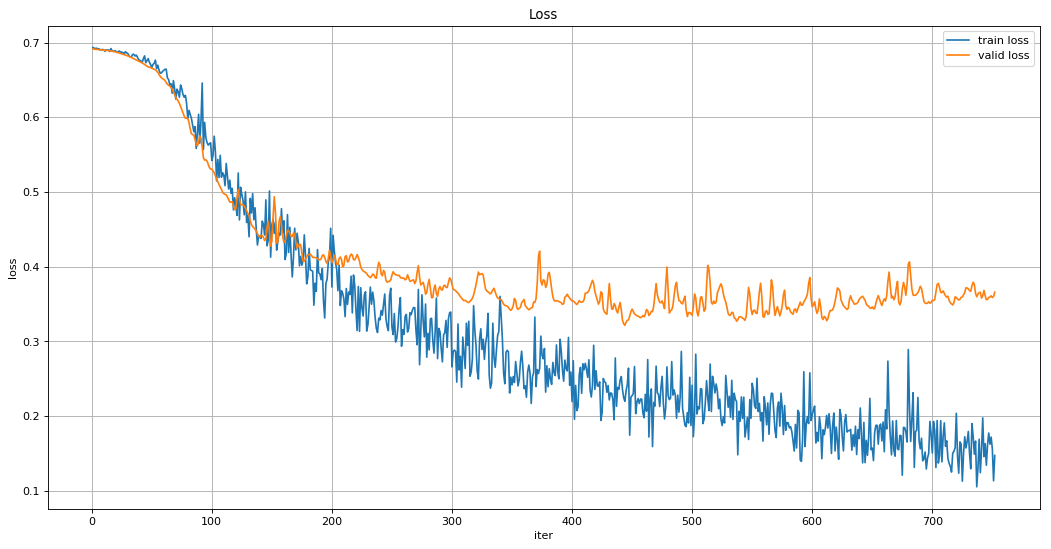

In [74]:
plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
iterations = list(range(1,iteration+1))
plt.plot(iterations, train_loss, label = "train loss")
plt.plot(iterations, valid_loss, label = "valid loss")
plt.title("Loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

## **Plot of training accuracy over iteration**

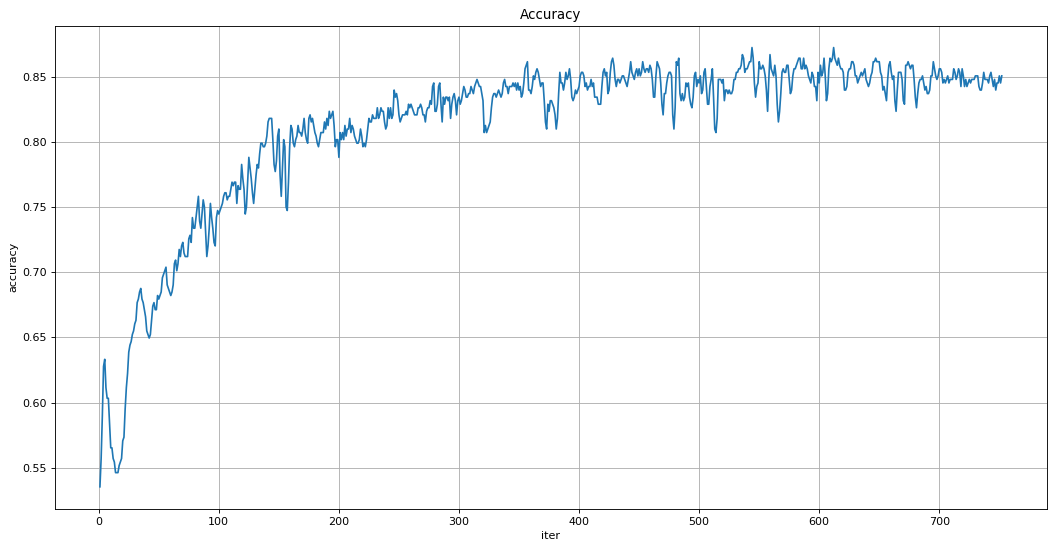

In [75]:
plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(iterations, valid_acc, label = "train loss")
plt.title("Accuracy")
plt.xlabel("iter")
plt.ylabel("accuracy")
plt.grid()
plt.show()

# **10. Advice**

After running this script I came to know hands on that RNN is really poor at multi channel image classification. So I would advice to try the different convolutional neural network architectures. CNN is more suited for image classification, while RNN is more suited for sequence training.